# Data import

In [1]:
library(knitr)
library(limma)
library(minfi)
library(IlluminaHumanMethylationEPICv2manifest)
library(IlluminaHumanMethylationEPICv2anno.20a1.hg38)
# library(IlluminaHumanMethylationEPICanno.ilm10b4.hg19)
library(ConsensusClusterPlus)
library(RColorBrewer)
library(missMethyl)
library(minfiData)
library(Gviz)
library(DMRcate)
library(stringr)
library(sva)
library(ConsensusClusterPlus)
library(RnBeads)

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following object is masked from 'package:limma':

    plotMA


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: S4Vectors


Attaching package: 'S4Vectors'


The following object is masked from 'package:utils':

    findMatches


The following objects are masked from 'package:base':

    I, expand.grid, unname


Loading required 

In [2]:
# set up a path to the data directory
idat.dir <- '../Dataset/RnBead_methylation/idat'

# get the EPICv2 annotation data
# sample.annotation <- getAnnotation(IlluminaHumanMethylationEPICv2anno.20a1.hg38)
sample.annotation <- '../Dataset/RnBead_methylation/Sample_annotation.csv'

# set up a path to the result directory
analysis.dir <- "../Intermediate_results"

# set up a path to the report directory
report.dir <- file.path(analysis.dir, "reports")

# Parallel processing
num.cores <- 1
parallel.setup(num.cores)


2024-07-15 22:42:49     5.0  STATUS STARTED Setting up Multicore
2024-07-15 22:42:49     5.0    INFO     Using 1 cores
2024-07-15 22:42:50     5.0  STATUS COMPLETED Setting up Multicore



In [3]:
data.source <- c(idat.dir, sample.annotation)
rnb.options(filtering.sex.chromosomes.removal=TRUE, identifiers.column="Sample_ID")


In [4]:
# # First run
# result <- rnb.run.import(data.source=data.source,
#                         data.type="idat.dir", dir.reports=report.dir, init.configuration=FALSE)
# rnb.set <- result$rnb.set

# Second run
rnb.set <- rnb.execute.import(data.source=data.source, data.type="infinium.idat.dir")


2024-07-15 22:42:50     5.0  STATUS STARTED Loading Data from IDAT Files
2024-07-15 22:42:51     5.0 WARNING     The sample sheet contained one column with empty names; renamed to Unknown Column No.
2024-07-15 22:42:51     5.0    INFO     Added column barcode to the provided sample annotation table
2024-07-15 22:42:52     5.0    INFO     Detected platform: MethylationEPICv2
2024-07-15 22:42:52     5.0    INFO     Annotation package genome assembly version: hg38
2024-07-15 22:43:36     5.2  STATUS COMPLETED Loading Data from IDAT Files



In [5]:
rnb.set
summary(pheno(rnb.set))


Object of class RnBeadRawSet
      96 samples
  923798 probes
	of which: 920026 CpG, 2906 CpH, 62 rs and 804 nv
Region types:
	  266859 regions of type tiling
	   38298 regions of type genes
	   45816 regions of type promoters
	   25381 regions of type cpgislands
Intensity information is present
Detection p-values are present
Bead counts are present
Quality control information is present
Summary of normalization procedures:
	The methylation data was not normalized.
	No background correction was performed.

 Unknown Column 1     index        Sample_ID         Sample_Well       
 Min.   : 0.00    Min.   : 1.00   Length:96          Length:96         
 1st Qu.:23.75    1st Qu.:24.75   Class :character   Class :character  
 Median :47.50    Median :48.50   Mode  :character   Mode  :character  
 Mean   :47.50    Mean   :48.50                                        
 3rd Qu.:71.25    3rd Qu.:72.25                                        
 Max.   :95.00    Max.   :96.00                                        
 Sample_Plate       Sample_Name        Pool_ID        Sample_Group      
 Length:96          Length:96          Mode:logical   Length:96         
 Class :character   Class :character   NA's:96        Class :character  
 Mode  :character   Mode  :character                  Mode  :character  
                                                                        
                                                                        
                                                          

In [6]:
dim(M(rnb.set))
summary(M(rnb.set))


[1] 923798     96

  FIN13295A89     FIN13295A90     FIN13295A91     FIN13295A92   
 Min.   :    0   Min.   :    0   Min.   :    0   Min.   :    0  
 1st Qu.: 1146   1st Qu.: 1071   1st Qu.: 1771   1st Qu.: 1139  
 Median : 3493   Median : 3466   Median : 5184   Median : 3389  
 Mean   : 5500   Mean   : 5563   Mean   : 6759   Mean   : 5740  
 3rd Qu.: 8651   3rd Qu.: 8852   3rd Qu.:10668   3rd Qu.: 8934  
 Max.   :42278   Max.   :40733   Max.   :44620   Max.   :44015  
 NA's   :100     NA's   :93      NA's   :276     NA's   :103    
  FIN13295A93     FIN13295A94     FIN13295A95     FIN13295A96   
 Min.   :    0   Min.   :    0   Min.   :    0   Min.   :    0  
 1st Qu.: 1560   1st Qu.: 1487   1st Qu.: 1942   1st Qu.: 1586  
 Median : 4584   Median : 4717   Median : 6042   Median : 4424  
 Mean   : 6527   Mean   : 6867   Mean   : 7862   Mean   : 6747  
 3rd Qu.:10284   3rd Qu.:10941   3rd Qu.:12487   3rd Qu.:10426  
 Max.   :44730   Max.   :46704   Max.   :48680   Max.   :50437  
 NA's   :228     NA's   :

In [7]:
dim(meth(rnb.set))
summary(meth(rnb.set))


[1] 923798     96

  FIN13295A89      FIN13295A90      FIN13295A91      FIN13295A92    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.1850   1st Qu.:0.1312   1st Qu.:0.2574   1st Qu.:0.1772  
 Median :0.6567   Median :0.5795   Median :0.6890   Median :0.6544  
 Mean   :0.5353   Mean   :0.5006   Mean   :0.5576   Mean   :0.5333  
 3rd Qu.:0.8226   3rd Qu.:0.8103   3rd Qu.:0.8278   3rd Qu.:0.8193  
 Max.   :0.9949   Max.   :0.9960   Max.   :0.9950   Max.   :0.9967  
 NA's   :143      NA's   :121      NA's   :354      NA's   :132     
  FIN13295A93      FIN13295A94      FIN13295A95      FIN13295A96    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.2138   1st Qu.:0.1608   1st Qu.:0.1835   1st Qu.:0.2427  
 Median :0.6777   Median :0.5918   Median :0.7068   Median :0.6497  
 Mean   :0.5472   Mean   :0.5115   Mean   :0.5560   Mean   :0.5396  
 3rd Qu.:0.8277   3rd Qu.:0.8153   3rd Qu.:0.8499   3rd Qu.:0.8095  
 Max.   :0.9962   Max.   :0.9966  

In [8]:
dim(meth(rnb.set, type="promoters"))
summary(meth(rnb.set, type="promoters"))


[1] 45816    96

  FIN13295A89        FIN13295A90        FIN13295A91        FIN13295A92      
 Min.   :0.002838   Min.   :0.001391   Min.   :0.002023   Min.   :0.009471  
 1st Qu.:0.172256   1st Qu.:0.138024   1st Qu.:0.181952   1st Qu.:0.161906  
 Median :0.444115   Median :0.393003   Median :0.516620   Median :0.458443  
 Mean   :0.447071   Mean   :0.414036   Mean   :0.471074   Mean   :0.445828  
 3rd Qu.:0.719433   3rd Qu.:0.676417   3rd Qu.:0.736680   3rd Qu.:0.714465  
 Max.   :0.989257   Max.   :0.984970   Max.   :0.993661   Max.   :0.988821  
 NA's   :2                             NA's   :1                            
  FIN13295A93        FIN13295A94        FIN13295A95        FIN13295A96      
 Min.   :0.001729   Min.   :0.004423   Min.   :0.001772   Min.   :0.006402  
 1st Qu.:0.165835   1st Qu.:0.177791   1st Qu.:0.163867   1st Qu.:0.183806  
 Median :0.477143   Median :0.408888   Median :0.469012   Median :0.459033  
 Mean   :0.455463   Mean   :0.430528   Mean   :0.463207   Mean   :0.448404  

In [9]:
summary(dpval(rnb.set))

  FIN13295A89         FIN13295A90         FIN13295A91        FIN13295A92       
 Min.   :0.0000000   Min.   :0.0000000   Min.   :0.000000   Min.   :0.0000000  
 1st Qu.:0.0000000   1st Qu.:0.0000000   1st Qu.:0.000000   1st Qu.:0.0000000  
 Median :0.0000000   Median :0.0000000   Median :0.000000   Median :0.0000000  
 Mean   :0.0004141   Mean   :0.0004539   Mean   :0.000536   Mean   :0.0004523  
 3rd Qu.:0.0000000   3rd Qu.:0.0000000   3rd Qu.:0.000000   3rd Qu.:0.0000000  
 Max.   :1.0000000   Max.   :1.0000000   Max.   :1.000000   Max.   :1.0000000  
  FIN13295A93         FIN13295A94         FIN13295A95       
 Min.   :0.0000000   Min.   :0.0000000   Min.   :0.0000000  
 1st Qu.:0.0000000   1st Qu.:0.0000000   1st Qu.:0.0000000  
 Median :0.0000000   Median :0.0000000   Median :0.0000000  
 Mean   :0.0003625   Mean   :0.0004707   Mean   :0.0002399  
 3rd Qu.:0.0000000   3rd Qu.:0.0000000   3rd Qu.:0.0000000  
 Max.   :1.0000000   Max.   :1.0000000   Max.   :1.0000000  
  FIN13295A96

# Quality control

In [10]:
rnb.run.qc(rnb.set, report.dir, close.report = TRUE)


2024-07-15 22:47:42    11.0  STATUS STARTED Quality Control
2024-07-15 22:47:43    11.0    INFO     Number of cores: 1
2024-07-15 22:47:43    11.0  STATUS     STARTED Quality Control Section
2024-07-15 22:47:56     6.5  STATUS         Added quality control box plots
2024-07-15 22:49:02     5.2  STATUS         Added quality control bar plots
2024-07-15 22:49:04     5.2  STATUS         Added negative control boxplots
2024-07-15 22:49:05     5.2  STATUS     COMPLETED Quality Control Section
2024-07-15 22:49:05     5.2  STATUS     STARTED Visualizing SNP Probe Data
2024-07-15 22:49:06     5.2  STATUS         STARTED Mixups Visualization Section
2024-07-15 22:49:10     6.5  STATUS             Added SNP Heatmap


Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by 'spam'

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by 'spam'



2024-07-15 22:49:11     6.5  STATUS             Calculated Manhattan distances between samples based on SNP probes
2024-07-15 22:49:12     6.5  STATUS             Added SNP-based Distances
2024-07-15 22:49:13     6.5  STATUS         COMPLETED Mixups Visualization Section
2024-07-15 22:49:13     6.5  STATUS     COMPLETED Visualizing SNP Probe Data
2024-07-15 22:49:14     6.5  STATUS COMPLETED Quality Control



# Preprocessing

In [11]:
# # First run
# rnb.set.unfiltered <- rnb.set
# result <- rnb.run.preprocessing(rnb.set.unfiltered, dir.reports=report.dir)
# rnb.set <- result$rnb.set


In [12]:
rnb.set.unfiltered <- rnb.set

## Filtering

In [13]:
# Second run
nrow(meth(rnb.set.unfiltered)) # the number of sites in the unfiltered object
# Remove probes outside of CpG context
rnb.set.filtered <- rnb.execute.context.removal(rnb.set.unfiltered)$dataset
nrow(meth(rnb.set.filtered)) # the number of CpG sites in the unfiltered object
# SNP filtering allowing no SNPs in the probe sequence
rnb.set.filtered <- rnb.execute.snp.removal(rnb.set.filtered, snp="any")$dataset
# the number of CpG sites in the unfiltered object
# that do not contain a SNP
nrow(meth(rnb.set.filtered))
# Remove CpGs on sex chromosomes
rnb.set.filtered <- rnb.execute.sex.removal(rnb.set.filtered)$dataset
nrow(meth(rnb.set.filtered))
# # Remove probes and samples based on a greedy approach
# rnb.set.filtered <- rnb.execute.greedycut(rnb.set.filtered)$dataset
# nrow(meth(rnb.set.filtered))
# Remove probes containing NA for beta values
rnb.set.filtered <- rnb.execute.na.removal(rnb.set.filtered)$dataset
nrow(meth(rnb.set.filtered))
# Remove probes for which the beta values have low standard deviation
rnb.set.filtered <- rnb.execute.variability.removal(rnb.set.filtered, 0.005)$dataset
nrow(meth(rnb.set.filtered))


[1] 923798

2024-07-15 22:49:15     7.9    INFO Detected nv probes in the dataset. Will not remove any nv probes based on context


[1] 920601

[1] 817358

[1] 794556

[1] 794556

[1] 784013

## Normalization

In [14]:
tmp <- rnb.set.filtered

In [15]:
rnb.set.norm <- rnb.execute.normalization(rnb.set.unfiltered, 
                                          method="illumina",
                                          bgcorr.method="methylumi.noob"
                                          )

2024-07-15 23:05:29     6.3 WARNING Incompatible dataset and background correction method: methylumi.noob is not supported for MethylationEPICv2. Changed the method to "none"
2024-07-15 23:05:29     6.3  STATUS Performed background subtraction with method none
2024-07-15 23:05:30     6.3 WARNING Incompatible dataset and normalization method: not supported for HumanMethylationEPICv2. Changed the method to "none"


# Covariate inference

In [16]:
 rnb.options(inference=TRUE)

In [17]:
rnb.set <- rnb.run.inference(rnb.set, report.dir)$rnb.set

2024-07-15 23:05:30     6.3  STATUS STARTED Covariate Inference
2024-07-15 23:05:31     6.3    INFO     Number of cores: 1
2024-07-15 23:05:34     5.2  STATUS COMPLETED Covariate Inference



In [18]:
rnb.set

Object of class RnBeadRawSet
      96 samples
  923798 probes
	of which: 920026 CpG, 2906 CpH, 62 rs and 804 nv
Region types:
	  266859 regions of type tiling
	   38298 regions of type genes
	   45816 regions of type promoters
	   25381 regions of type cpgislands
Intensity information is present
Detection p-values are present
Bead counts are present
Quality control information is present
Summary of normalization procedures:
	The methylation data was not normalized.
	No background correction was performed.

## Surrogate Variable Analysis

In [19]:
sva.obj <- rnb.execute.sva(rnb.set.norm, cmp.cols="Sample_Group", numSVmethod="be")
rnb.set.sv <- set.covariates.sva(rnb.set.norm, sva.obj)
rnb.set.sv

In [ ]:
save.rnb.set(rnb.set.sv, file.path(analysis.dir, "rnb.set.sv.RData"))
save.rnb.set(rnb.set.norm, file.path(analysis.dir, "rnb.set.norm.RData"))
save.rnb.set(rnb.set, file.path(analysis.dir, "rnb.set.RData"))

# Exploratory analysis

In [ ]:
rnb.run.exploratory(rnb.set, report.dir)

# Differential Methylation Analysis

In [ ]:
head(pheno(rnb.set))

,Unknown Column 1,index,Sample_ID,Sample_Well,Sample_Plate,Sample_Name,Pool_ID,Sample_Group,I.D.Code,Sample,Sample.Type,Tumour.Normal,Collection,Institution,Sentrix_Position,Sentrix_ID,Basename,barcode
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,0,1,FIN13295A89,A12,207881760004_R01C01_FIN13295A89_A12,I_D_102,NA,Diffuse midline glioma,I-D-102,SU-DIPG-17,Cell-line,Tumour,Post-mortem,Stanford Univeristy,R01C01,207881760004,../Dataset/Izac_Methylomics/FIN13296/iDAT/207881760004/207881760004_R01C01/207881760004_R01C01,207881760004_R01C01
2,1,2,FIN13295A90,B12,207881760004_R02C01_FIN13295A90_B12,I_D_103,NA,Diffuse midline glioma,I-D-103,RA055,Cell-line,Tumour,Progression,Zero Childhood Cancer,R02C01,207881760004,../Dataset/Izac_Methylomics/FIN13296/iDAT/207881760004/207881760004_R02C01/207881760004_R02C01,207881760004_R02C01
3,2,3,FIN13295A91,C12,207881760004_R03C01_FIN13295A91_C12,I_D_104,NA,Diffuse midline glioma,I-D-104,PBT-28,Cell-line,Tumour,Diagnosis,Seattle Children's Hospital,R03C01,207881760004,../Dataset/Izac_Methylomics/FIN13296/iDAT/207881760004/207881760004_R03C01/207881760004_R03C01,207881760004_R03C01
4,3,4,FIN13295A92,D12,207881760004_R04C01_FIN13295A92_D12,I_D_105,NA,Diffuse midline glioma,I-D-105,P002306,Cell-line,Tumour,Unknown,Zero Childhood Cancer,R04C01,207881760004,../Dataset/Izac_Methylomics/FIN13296/iDAT/207881760004/207881760004_R04C01/207881760004_R04C01,207881760004_R04C01
5,4,5,FIN13295A93,E12,207881760004_R05C01_FIN13295A93_E12,I_D_106,NA,Diffuse midline glioma,I-D-106,P007601,Cell-line,Tumour,Unknown,Zero Childhood Cancer,R05C01,207881760004,../Dataset/Izac_Methylomics/FIN13296/iDAT/207881760004/207881760004_R05C01/207881760004_R05C01,207881760004_R05C01
6,5,6,FIN13295A94,F12,207881760004_R06C01_FIN13295A94_F12,I_D_107,NA,Diffuse midline glioma,I-D-107,P005401 Progression,Cell-line,Tumour,Progression,Zero Childhood Cancer,R06C01,207881760004,../Dataset/Izac_Methylomics/FIN13296/iDAT/207881760004/207881760004_R06C01/207881760004_R06C01,207881760004_R06C01


In [ ]:
# rnb.options("differential.variability"=TRUE)

In [ ]:
install.packages("hexbin")

Installing package into '/Users/c3503862/Library/R/arm64/4.4/library'
(as 'lib' is unspecified)




The downloaded binary packages are in
	/var/folders/y0/1cs3npgn3jn68yvgp05r7ntc0000gr/T//RtmpFg381V/downloaded_packages


In [ ]:
rnb.set.norm

Object of class RnBeadRawSet
      96 samples
  923798 probes
	of which: 920026 CpG, 2906 CpH, 62 rs and 804 nv
Region types:
	  266859 regions of type tiling
	   38298 regions of type genes
	   45816 regions of type promoters
	   25381 regions of type cpgislands
Intensity information is present
Detection p-values are present
Bead counts are present
Quality control information is present
Summary of normalization procedures:
	The methylation data was not normalized.
	No background correction was performed.

In [ ]:
A NAMED vector containing for each column name for which paired analysis should be performed (say columnA) the name or index of another column (say columnB) in which same values indicate the same pairing. columnA should be the name of the value columnB in this vector. For more details see rnb.sample.groups

In [ ]:
rnb.options("differential.comparison.columns"=c("Sample.Type", "Sample_Group", "Tumour.Normal"), 
            "columns.pairing"=c("Sample.Type"="Sample_Group", 
                                "Sample.Type"="Tumour.Normal",
                                "Sample_Group"="Tumour.Normal",
                                "Sample_Group"="Sample_Type",
                                "Tumour.Normal"="Sample_Group",
                                "Tumour.Normal"="Sample_Type"))
rnb.run.differential(rnb.set.norm, report.dir)


2024-07-04 15:12:45     7.1  STATUS                                                                                                                                                             STARTED Differential Methylation
2024-07-04 15:12:46     7.1    INFO                                                                                                                                                                 Number of cores: 1
2024-07-04 15:12:47     7.1  STATUS                                                                                                                                                                 STARTED Analysis
2024-07-04 15:12:47     7.1    INFO                                                                                                                                                                     Using 0 permutation tests
2024-07-04 15:12:47     7.1    INFO                                                                                      

coef not specified. Using all columns of design matrix.



2024-07-04 15:13:49    13.0  STATUS                                                                                                                                                                                 COMPLETED diffVar method
2024-07-04 15:14:04    12.0  STATUS                                                                                                                                                                             COMPLETED Computing Differential Methylation Table
2024-07-04 15:14:05    12.0  STATUS                                                                                                                                                                             STARTED Computing Differential Methylation Tables (Region Level)
2024-07-04 15:16:13     8.9  STATUS                                                                                                                                                                                 Computed table for 

coef not specified. Using all columns of design matrix.



2024-07-04 15:18:14    14.0  STATUS                                                                                                                                                                                 COMPLETED diffVar method
2024-07-04 15:18:29    12.0  STATUS                                                                                                                                                                             COMPLETED Computing Differential Methylation Table
2024-07-04 15:18:30    12.0  STATUS                                                                                                                                                                             STARTED Computing Differential Methylation Tables (Region Level)
2024-07-04 15:20:33    11.0  STATUS                                                                                                                                                                                 Computed table for 

opening ff /private/var/folders/y0/1cs3npgn3jn68yvgp05r7ntc0000gr/T/RtmpFg381V/diffMethTables_444651156d4/sites_cmp1.ff

opening ff /private/var/folders/y0/1cs3npgn3jn68yvgp05r7ntc0000gr/T/RtmpFg381V/diffMethTables_444651156d4/sites_cmp2.ff



2024-07-04 15:47:01     7.0  STATUS                                                                                                                                                                         COMPLETED Selection of rank cutoffs
2024-07-04 15:47:02     7.0  STATUS                                                                                                                                                                         STARTED Adding scatterplots
2024-07-04 15:53:53     9.0  STATUS                                                                                                                                                                         COMPLETED Adding scatterplots
2024-07-04 15:53:53     9.0  STATUS                                                                                                                                                                         STARTED Adding volcano plots
2024-07-04 15:55:57     8.0  STATUS                          

ERROR: Error in .lock2(dbfile, exclusive = TRUE): requested an exclusive lock when caller only holds a shared lock


In [ ]:
rnb.set.norm
summary(pheno(rnb.set.norm))


Object of class RnBeadRawSet
      96 samples
  923798 probes
	of which: 920026 CpG, 2906 CpH, 62 rs and 804 nv
Region types:
	  266859 regions of type tiling
	   38298 regions of type genes
	   45816 regions of type promoters
	   25381 regions of type cpgislands
Intensity information is present
Detection p-values are present
Bead counts are present
Quality control information is present
Summary of normalization procedures:
	The methylation data was not normalized.
	No background correction was performed.

 Unknown Column 1     index        Sample_ID         Sample_Well       
 Min.   : 0.00    Min.   : 1.00   Length:96          Length:96         
 1st Qu.:23.75    1st Qu.:24.75   Class :character   Class :character  
 Median :47.50    Median :48.50   Mode  :character   Mode  :character  
 Mean   :47.50    Mean   :48.50                                        
 3rd Qu.:71.25    3rd Qu.:72.25                                        
 Max.   :95.00    Max.   :96.00                                        
 Sample_Plate       Sample_Name        Pool_ID        Sample_Group      
 Length:96          Length:96          Mode:logical   Length:96         
 Class :character   Class :character   NA's:96        Class :character  
 Mode  :character   Mode  :character                  Mode  :character  
                                                                        
                                                                        
                                                          

In [ ]:
cmp.cols <- "Sample_Group"
diffmeth <- rnb.execute.computeDiffMeth(rnb.set.norm, pheno.cols=c("Sample_Group","Sample.Type"))



2024-07-04 10:04:50    11.0  STATUS                                     STARTED Retrieving comparison info
2024-07-04 10:04:50    11.0  STATUS                                     COMPLETED Retrieving comparison info
2024-07-04 10:04:51    11.0  STATUS                                     STARTED Computing differential methylation tables
2024-07-04 10:04:51    11.0  STATUS                                         STARTED Comparing: Cell-line vs. Tissue (based on Sample.Type)
2024-07-04 10:04:51    11.0  STATUS                                             STARTED Computing Differential Methylation Table
2024-07-04 10:04:52    13.0    INFO                                                 Conducting differential analysis using limma
2024-07-04 10:05:25    14.0  STATUS                                             COMPLETED Computing Differential Methylation Table
2024-07-04 10:05:26    15.0  STATUS                                             STARTED Computing Differential Methylation Tables (Reg

cmp1 
"Cell-line vs. Tissue (based on Sample.Type)"

In [ ]:
comparison <- get.comparisons(diffmeth)[1]
tab.sites <- get.table(diffmeth, comparison, "sites", return.data.frame=TRUE)
str(tab.sites)


'data.frame':	923798 obs. of  24 variables:
 $ mean.g1                : num  0.0246 0.2409 0.3854 0.389 0.3149 ...
 $ mean.g2                : num  0.0222 0.5574 0.2937 0.4715 0.3276 ...
 $ mean.diff              : num  0.00243 -0.3165 0.0917 -0.08249 -0.01271 ...
 $ mean.quot.log2         : num  0.1049 -1.1771 0.3807 -0.2712 -0.0554 ...
 $ diffmeth.p.val         : num  7.95e-02 7.31e-16 1.21e-02 1.65e-03 3.78e-01 ...
 $ max.g1                 : num  0.0456 0.5735 0.622 0.6423 0.4939 ...
 $ min.g1                 : num  0.0149 0.033 0.0718 0.1754 0.1253 ...
 $ sd.g1                  : num  0.00654 0.14642 0.17014 0.13861 0.09492 ...
 $ max.g2                 : num  0.0345 0.82 0.5868 0.7128 0.5107 ...
 $ min.g2                 : num  0.00565 0.14967 0.09946 0.22286 0.12891 ...
 $ sd.g2                  : num  0.00558 0.14797 0.0861 0.11015 0.07612 ...
 $ min.diff               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ diffmeth.p.adj.fdr     : num  1.23e-01 1.64e-14 2.35e-02 3.94e-03 4.63e-01 .

In [ ]:
tab.promoters <- get.table(diffmeth, comparison, "promoters",
return.data.frame=TRUE)
str(tab.promoters)

'data.frame':	45816 obs. of  14 variables:
 $ mean.mean.g1                : num  0.0246 0.0246 0.0246 0.0315 0.1229 ...
 $ mean.mean.g2                : num  0.0222 0.0222 0.0222 0.0316 0.1049 ...
 $ mean.mean.diff              : num  0.002426 0.002426 0.002426 -0.000144 0.017964 ...
 $ mean.mean.quot.log2         : num  0.105 0.105 0.105 -0.005 0.21 ...
 $ comb.p.val                  : num  0.079456 0.079456 0.079456 0.737653 0.000165 ...
 $ comb.p.adj.fdr              : num  0.095941 0.095941 0.095941 0.744823 0.000422 ...
 $ num.sites                   : num  1 1 1 1 1 1 1 1 1 2 ...
 $ mean.num.na.g1              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mean.num.na.g2              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mean.mean.covg.g1           : num  10.6 10.6 10.6 8.77 11.8 ...
 $ mean.mean.covg.g2           : num  11.05 11.05 11.05 9.27 10.68 ...
 $ mean.nsamples.covg.thresh.g1: num  28 28 28 25 30 30 30 30 29 30 ...
 $ mean.nsamples.covg.thresh.g2: num  65 65 65 63 65 65 65 65 65 65.5 ...

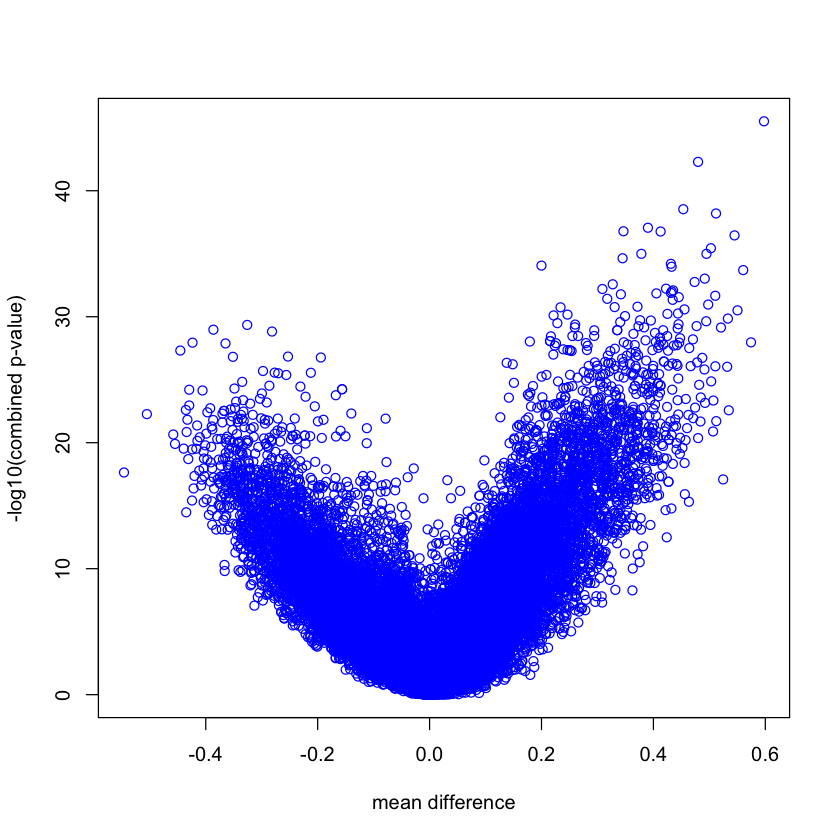

In [ ]:
dmps <- tab.sites[order(tab.sites[, "combinedRank"]), ]
which.diffmeth <- abs(dmps[, "mean.diff"]) > 0.2 & dmps$diffmeth.p.adj.fdr<0.05
  dmps.cutoff <- dmps[which.diffmeth, ]
dmrs <- get.table(diffmeth, comparison, "promoters")

plot(dmrs[, "mean.mean.diff"], -log10(dmrs[, "comb.p.val"]),
xlab="mean difference", ylab="-log10(combined p-value)", col="blue")

## Differential variability analysis

In [ ]:
rnb.set.norm

Object of class RnBeadRawSet
      96 samples
  923798 probes
	of which: 920026 CpG, 2906 CpH, 62 rs and 804 nv
Region types:
	  266859 regions of type tiling
	   38298 regions of type genes
	   45816 regions of type promoters
	   25381 regions of type cpgislands
Intensity information is present
Detection p-values are present
Bead counts are present
Quality control information is present
Summary of normalization procedures:
	The methylation data was not normalized.
	No background correction was performed.

In [ ]:
cmp.cols <- "Sample_Group"
reg.types <- c("genes", "promoters")
diff.var <- rnb.execute.diffVar(rnb.set, cmp.cols, region.types=reg.types)
diff.var

comparison <- get.comparisons(diff.var)[1]
tab.sites <- get.table(diff.var, comparison,"sites", return.data.frame=TRUE)
tab.genes <- get.table(diff.var, comparison,"genes", return.data.frame=TRUE)

2024-07-04 09:30:54    15.0  STATUS                     STARTED Differential Variability
2024-07-04 09:30:54    15.0  STATUS                         STARTED Retrieving comparison info
2024-07-04 09:30:55    15.0 WARNING                             No valid grouping information found. NULL returned
2024-07-04 09:30:55    15.0  STATUS                         COMPLETED Retrieving comparison info


NULL

ERROR: Error: unable to find an inherited method for function 'get.comparisons' for signature 'object = "NULL"'
